In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sqlite3
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

#Step 1: Loading the dataset. Download the set, we are only interested in the Latitude, Longitude and MedInc columns.

In [85]:
data= pd.read_csv("data/housing.csv", sep = ",")
data=data[["Latitude","Longitude","MedInc"]]
data.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


Split the dataset into train and test.  Use them to train the unsupervised algorithm and then to make predictions about new points to predict the cluster they are associated with.

In [86]:
X_train, X_test = train_test_split(data, test_size = 0.2, random_state = 42)
X_train.head()

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


Step 2: Build a K-Means
Classify the data into 6 clusters using the K-Means model. 

In [87]:
model_unsup = KMeans(n_clusters=6, n_init="auto", random_state=42)
model_unsup.fit(X_train)



KMeans(n_clusters=6, random_state=42)

Then store the cluster to which each house belongs as a new column in the dataset. You could call it cluster. To introduce it to your dataset, you may have to categorize it. See what format and values it has, and act accordingly. 

In [88]:
y_train = list(model_unsup.labels_)
X_train["cluster"] = y_train
X_train.head()

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


WCSS

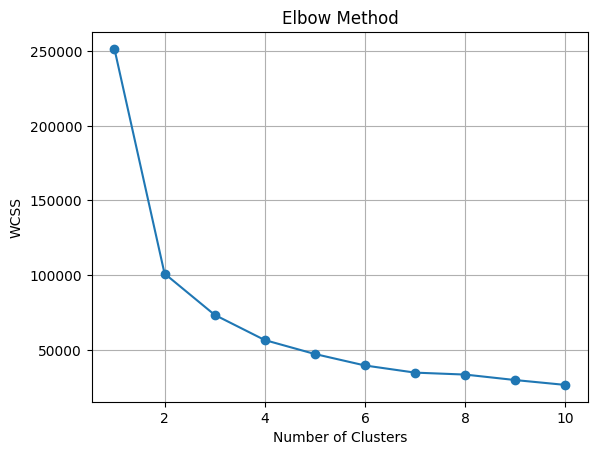

In [89]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Step 3: Predict with the test set
Now use the trained model with the test set and add the points to the above plot to confirm that the prediction is successful or not.

In [90]:
y_test = list(model_unsup.predict(X_test))
X_test["cluster"] = y_test

3D plot of prediction

/tmp/ipykernel_18647/1459558326.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_test = ax.scatter(


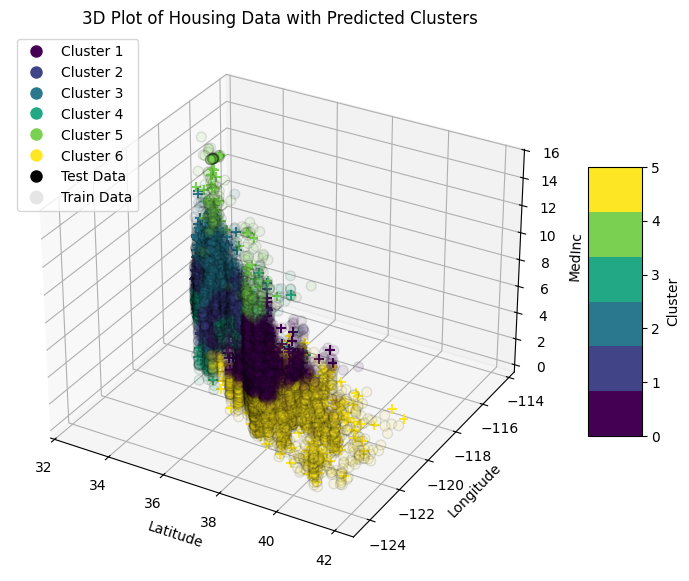

In [91]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# Set up the 3D figure 
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a colormap
colors = plt.get_cmap('viridis', 6)

# Scatter plot for X_test
sc_test = ax.scatter(
    X_test['Latitude'],
    X_test['Longitude'],
    X_test['MedInc'],
    c=X_test['cluster'],  # Use the 'cluster' column for color coding
    cmap=colors,
    marker="+", edgecolor='k', s=50, depthshade=False
)

# Scatter plot for X_train
sc_train = ax.scatter(
    X_train['Latitude'],
    X_train['Longitude'],
    X_train['MedInc'],
    c=X_train['cluster'],  # Use the 'cluster' column for color coding
    cmap=colors,
    alpha=0.1,  # Adjust alpha for visibility
    edgecolor='k', s=50, depthshade=False
)

# Create a colorbar
cbar = fig.colorbar(sc_test, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Cluster')

# Manually create a custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors(i), markersize=10, label=f'Cluster {i+1}') for i in range(6)]
# Add dataset labels
legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Test Data'))
legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, alpha=0.1, label='Train Data'))

# Add legend to the plot
ax.legend(handles=legend_elements, loc='upper left', fontsize='medium')

# Set plot titles and labels
ax.set_title('3D Plot of Housing Data with Predicted Clusters')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('MedInc')

# Show the plot
plt.show()


2D Plot of Prediction

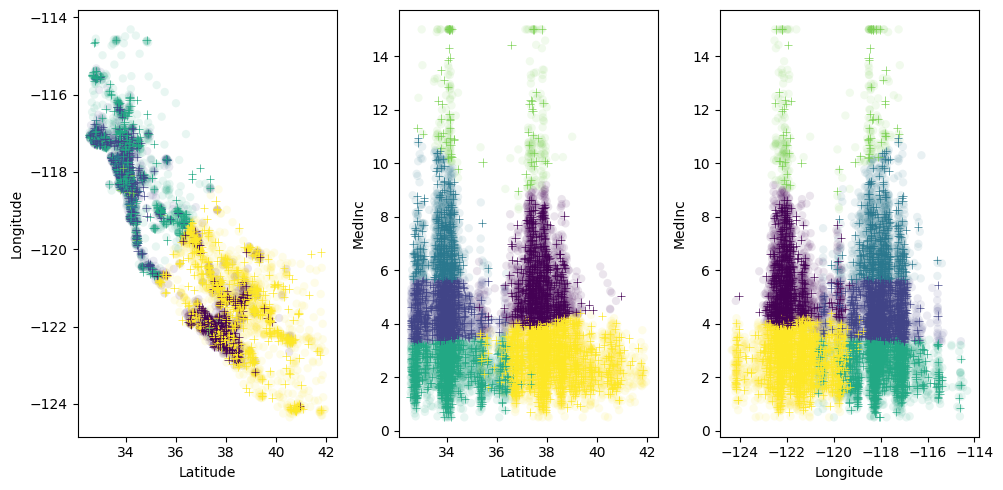

In [92]:
fig, axis = plt.subplots(1, 3, figsize = (10, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "viridis", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "viridis", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "viridis", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "viridis", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "viridis", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "viridis", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

Extra: Mapping the Train vs Test sets.

Step 4: Application of Supervised Methods of Prediction. Possible ML techniques: Logistic Regression,  Regularized Linear Regression, Decision Tree, Random Forest, Boosting, Naive Bayes, K-nearest Neighbors.
Selected K-Nearest Neighbors.

In [93]:
from sklearn.tree import DecisionTreeClassifier

model_sup = DecisionTreeClassifier(random_state = 42)
model_sup.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

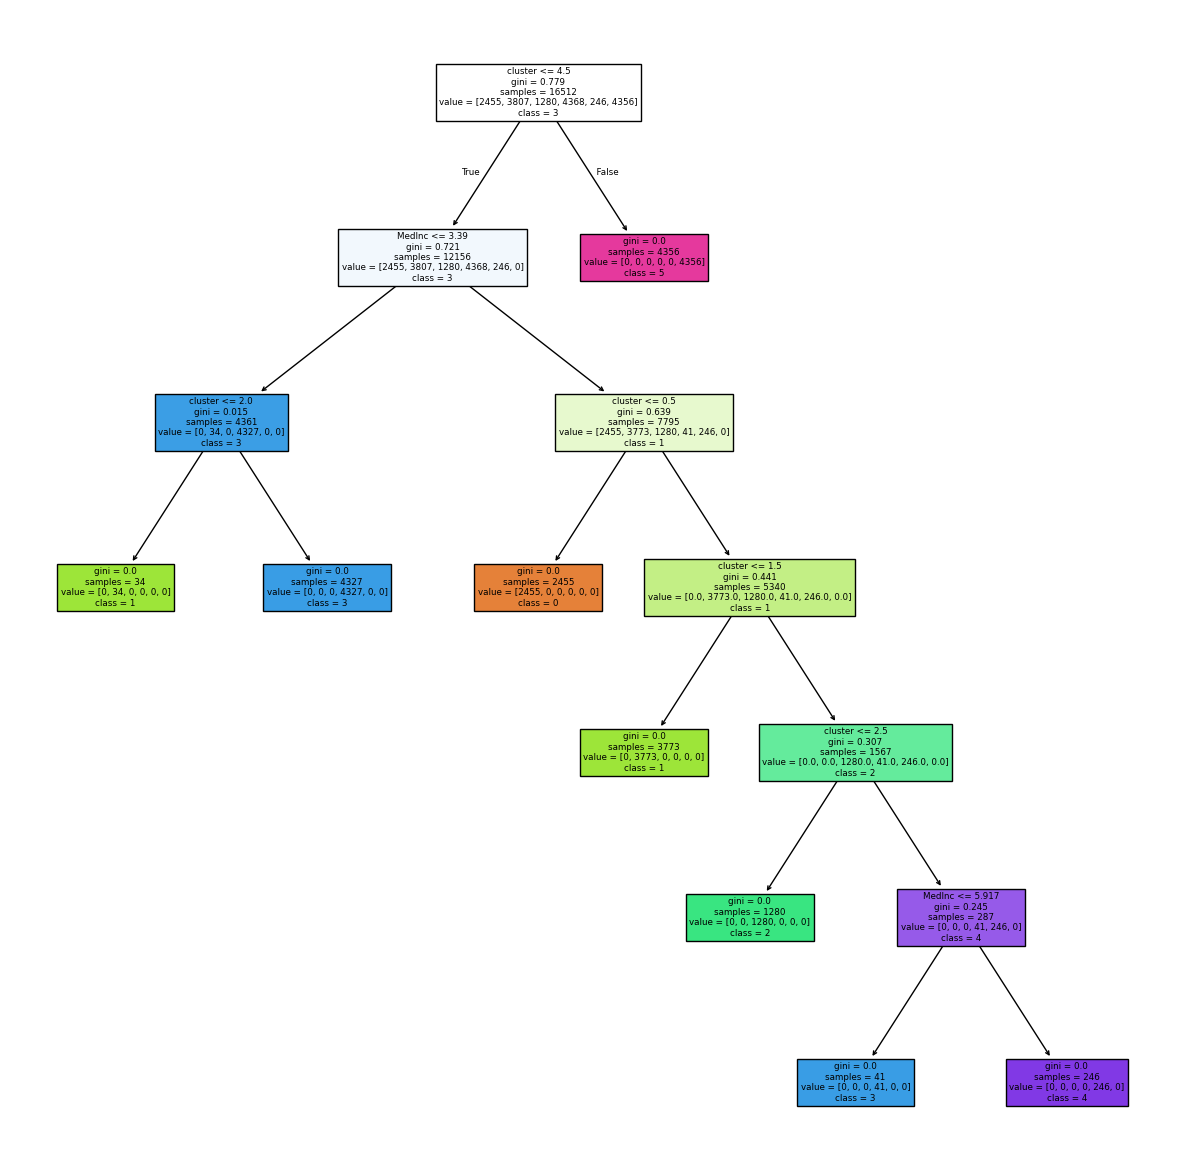

In [94]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_sup, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [95]:
y_pred = model_sup.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [96]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

In [97]:
from pickle import dump

dump(model_unsup, open("models/k-means_default_42.sav", "wb"))
dump(model_sup, open("models/decision_tree_classifier_default_42.sav", "wb"))